In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Overlaid Histograms

In [2]:
galton = Table.read_table('galton.csv')
galton.show(3)

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69


In [3]:
height = galton.select('father', 'mother', 'childHeight').relabeled(2, 'child')
height

father,mother,child
78.5,67,73.2
78.5,67,69.2
78.5,67,69
78.5,67,69
75.5,66.5,73.5
75.5,66.5,72.5
75.5,66.5,65.5
75.5,66.5,65.5
75,64,71
75,64,68


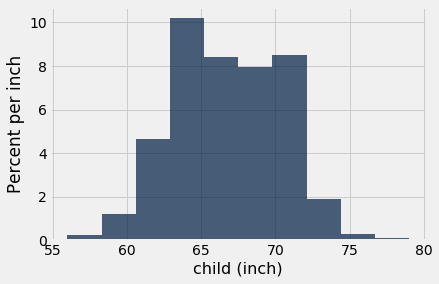

In [4]:
height.hist('child', unit='inch')

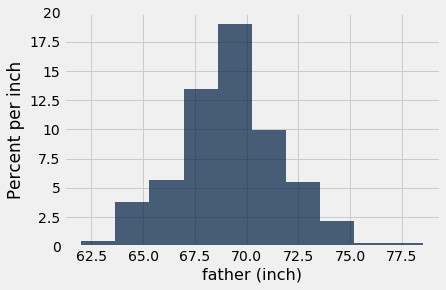

In [5]:
height.hist('father', unit='inch')

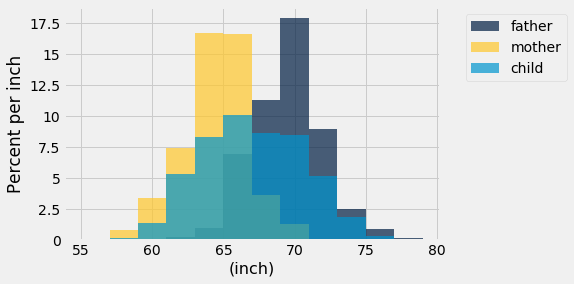

In [6]:
height.hist(unit='inch', bins=np.arange(55, 80, 2))

Question: why is the maximum height of a bar for child smaller than that for mother or father?
* A) mothers and fathers are adult height; kids might be kid heights
* B) kids could be either gender, leading to a wider distribution

## Functions

In [7]:
def double(x):
    """ Double x """
    return 2*x

In [8]:
help(double)

Help on function double in module __main__:

double(x)
    Double x



In [9]:
double(5)

10

In [10]:
x

NameError: name 'x' is not defined

In [11]:
double(5/4)

2.5

In [12]:
y = 5
double(y/4)

2.5

In [13]:
x

NameError: name 'x' is not defined

In [14]:
x = 1.5
double(x)

3.0

In [15]:
x

1.5

What happens if I double an array?

In [16]:
double(make_array(3,4,5))

array([ 6,  8, 10])

What happens if I double a string?

In [17]:
double("string")

'stringstring'

In [18]:
5*"string"

'stringstringstringstringstring'

What does this code do?

In [19]:
counts = make_array(1, 2, 3)
total = counts.sum()
np.round((counts/total)*100, 2)

array([16.67, 33.33, 50.  ])

In [20]:
def percents(counts):
    """Convert the counts to percents out of the total."""
    total = counts.sum()
    return np.round((counts/total)*100, 2)

In [21]:
percents(counts)

array([16.67, 33.33, 50.  ])

In [22]:
percents(make_array(2, 4, 8, 6, 10))

array([ 6.67, 13.33, 26.67, 20.  , 33.33])

In [23]:
def percents(counts, decimal_places=2, extra=0):
    """Convert the counts to percents out of the total + extra."""
    total = counts.sum() + extra
    return np.round((counts/total)*100, decimal_places)

parts = make_array(2, 1, 4)
print("Rounded to 1 decimal place:", percents(parts, 1), "or", percents(parts, decimal_places=1))
print("Rounded to the default number of decimal places:", percents(parts))
print("Rounded to the default number of decimal places, but with extra:", percents(parts, extra=3))

Rounded to 1 decimal place: [28.6 14.3 57.1] or [28.6 14.3 57.1]
Rounded to the default number of decimal places: [28.57 14.29 57.14]
Rounded to the default number of decimal places, but with extra: [20. 10. 40.]


# Scope

In [24]:
def tell_me_arg_value(arg):
    return arg

In [25]:
tell_me_arg_value(8)

8

In [26]:
tell_me_arg_value(5)

5

In [27]:
def tell_me_another_arg_value(arg):
    return another_arg

In [28]:
tell_me_another_arg_value(8)

NameError: name 'another_arg' is not defined

In [29]:
another_arg = 7

In [30]:
tell_me_another_arg_value(8)

7

## Apply

In [31]:
def cut_off_at_72(x):
    """The smaller of x and 72"""
    return min(x, 72)

In [32]:
cut_off_at_72(62)

62

In [33]:
cut_off_at_72(72)

72

In [34]:
cut_off_at_72(78)

72

The table `apply` method applies a function to every entry in a column.

In [35]:
cut_off = height.apply(cut_off_at_72, 'child')
cut_off

array([72. , 69.2, 69. , 69. , 72. , 72. , 65.5, 65.5, 71. , 68. , 70.5,
       68.5, 67. , 64.5, 63. , 72. , 69. , 68. , 66.5, 62.5, 62.5, 69.5,
       72. , 72. , 72. , 72. , 70.5, 64. , 70.5, 68. , 66. , 66. , 65.5,
       72. , 70. , 68. , 67. , 67. , 66. , 63.5, 63. , 65. , 71. , 62. ,
       68. , 67. , 71. , 70.5, 66.7, 72. , 70.5, 70.2, 70.2, 69.2, 68.7,
       66.5, 64.5, 63.5, 72. , 72. , 71.5, 62.5, 66.5, 62.3, 66. , 64.5,
       64. , 62.7, 72. , 72. , 72. , 70. , 69. , 68.5, 68. , 66. , 72. ,
       68.5, 68. , 72. , 71. , 67. , 72. , 70.5, 69.5, 66. , 65.5, 65. ,
       65. , 65.5, 66. , 63. , 70.5, 70.5, 69. , 65. , 63. , 69. , 67. ,
       63. , 72. , 67. , 70.5, 70. , 66.5, 63. , 67.5, 67.2, 66.7, 64. ,
       71. , 70. , 70. , 66. , 65. , 65. , 72. , 72. , 69. , 67.5, 63.5,
       72. , 71.5, 71.5, 70. , 68. , 65.7, 72. , 72. , 72. , 72. , 67. ,
       72. , 72. , 69. , 67. , 70. , 67. , 67. , 66.5, 70. , 69. , 68.5,
       66. , 64.5, 63. , 71. , 67. , 72. , 72. , 71

In [36]:
cut_off_at_72

<function __main__.cut_off_at_72>

In [37]:
type(cut_off_at_72)

function

In [38]:
help(cut_off_at_72)

Help on function cut_off_at_72 in module __main__:

cut_off_at_72(x)
    The smaller of x and 72



## Apply with multiple columns

In [39]:
parent_max = height.apply(max, 'mother', 'father')
parent_max

array([78.5, 78.5, 78.5, 78.5, 75.5, 75.5, 75.5, 75.5, 75. , 75. , 75. ,
       75. , 75. , 75. , 75. , 75. , 75. , 75. , 75. , 75. , 75. , 74. ,
       74. , 74. , 74. , 74. , 74. , 74. , 74. , 74. , 74. , 74.5, 74. ,
       74. , 74. , 74. , 74. , 74. , 74. , 74. , 74. , 74. , 73. , 73. ,
       73. , 73. , 73. , 73. , 73. , 73. , 73. , 73. , 73. , 73. , 73. ,
       73. , 73. , 73. , 73. , 73. , 73. , 73. , 73. , 73. , 73. , 73. ,
       73. , 73.2, 72.7, 72.7, 72.7, 72.7, 72.7, 72.7, 72.7, 72.7, 72. ,
       72. , 72. , 72. , 72. , 72. , 72. , 72. , 72. , 72. , 72. , 72. ,
       72. , 72. , 72. , 72. , 72. , 72. , 72. , 72. , 72. , 72. , 72. ,
       72. , 72. , 72. , 72. , 72. , 72. , 72. , 72.5, 72.5, 72.5, 72. ,
       72.5, 72.5, 72.5, 72.5, 72.5, 72.5, 72. , 72. , 72. , 72. , 72. ,
       72. , 72. , 72. , 72. , 72. , 72. , 71. , 71. , 71. , 71. , 71. ,
       71. , 71. , 71. , 71. , 71. , 71. , 71. , 71. , 71. , 71. , 71. ,
       71. , 71. , 71. , 71. , 71. , 71. , 71. , 71

In [40]:
def avg(x, y):
    """Compute the average of two values"""
    return (x+y)/2

In [41]:
parent_avg = height.apply(avg, 'mother', 'father')
parent_avg

array([72.75, 72.75, 72.75, 72.75, 71.  , 71.  , 71.  , 71.  , 69.5 ,
       69.5 , 69.5 , 69.5 , 69.5 , 69.5 , 69.5 , 66.75, 66.75, 66.75,
       66.75, 66.75, 66.75, 71.  , 71.  , 71.  , 71.  , 71.  , 71.  ,
       71.  , 70.25, 70.25, 70.25, 70.25, 69.75, 68.  , 68.  , 68.  ,
       68.  , 68.  , 68.  , 68.  , 68.  , 67.5 , 70.  , 70.  , 70.  ,
       70.  , 69.75, 69.75, 69.75, 69.  , 69.  , 69.  , 69.  , 69.  ,
       69.  , 69.  , 69.  , 69.  , 68.75, 68.75, 68.75, 68.75, 68.75,
       68.75, 68.5 , 68.5 , 68.5 , 68.1 , 70.85, 70.85, 70.85, 70.85,
       70.85, 70.85, 70.85, 70.85, 70.  , 70.  , 70.  , 69.5 , 69.5 ,
       69.5 , 68.5 , 68.5 , 68.5 , 68.5 , 68.5 , 68.5 , 68.5 , 68.75,
       68.  , 68.  , 67.5 , 67.5 , 67.5 , 67.5 , 67.5 , 67.5 , 67.5 ,
       67.5 , 67.5 , 67.5 , 67.5 , 67.5 , 67.5 , 67.5 , 68.  , 68.  ,
       68.  , 67.  , 67.25, 67.25, 67.25, 67.25, 67.25, 67.25, 67.  ,
       67.  , 67.  , 67.  , 67.  , 67.  , 67.  , 67.  , 67.  , 67.  ,
       66.5 , 70.  ,

## Prediction

In [42]:
height

father,mother,child
78.5,67,73.2
78.5,67,69.2
78.5,67,69
78.5,67,69
75.5,66.5,73.5
75.5,66.5,72.5
75.5,66.5,65.5
75.5,66.5,65.5
75,64,71
75,64,68


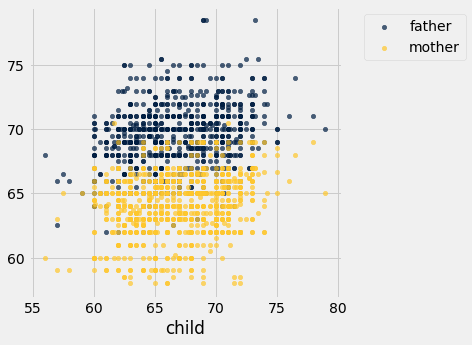

In [43]:
height.scatter('child')

Add a column with parents' average height to the height table

In [44]:
height = height.with_column(
    'parent average', parent_avg
)
height

father,mother,child,parent average
78.5,67,73.2,72.75
78.5,67,69.2,72.75
78.5,67,69,72.75
78.5,67,69,72.75
75.5,66.5,73.5,71
75.5,66.5,72.5,71
75.5,66.5,65.5,71
75.5,66.5,65.5,71
75,64,71,69.5
75,64,68,69.5


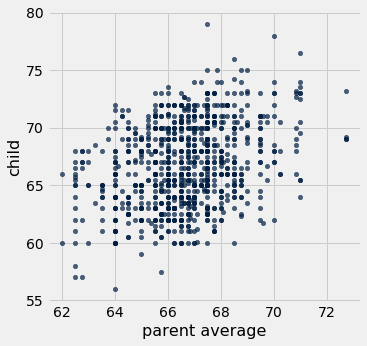

In [45]:
height.scatter('parent average', 'child')

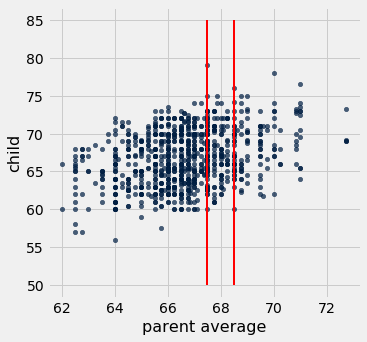

In [46]:
height.scatter('parent average', 'child')

# this code draws two red lines on the plot to show 
# children whose parents' average heights are around 68
_ = plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
_ = plots.plot([68.5, 68.5], [50, 85], color='red', lw=2)

In [47]:
close_to_68 = height.where('parent average', are.between(67.5, 68.5))
close_to_68

father,mother,child,parent average
74,62,74,68
74,62,70,68
74,62,68,68
74,62,67,68
74,62,67,68
74,62,66,68
74,62,63.5,68
74,62,63,68
74,61,65,67.5
73.2,63,62.7,68.1


In [48]:
close_to_68.column('child').mean()

67.62

In [49]:
def predict_child(pa):
    close_points = height.where('parent average', are.between(pa - 0.5, pa + 0.5))
    return close_points.column('child').mean()                       

In [50]:
predict_child(68)

67.62

In [51]:
predict_child(65)

65.83829787234043

In [52]:
# Apply predict_child to all the parent averages

height_pred = height.with_column(
    'prediction', height.apply(predict_child, 'parent average')
)

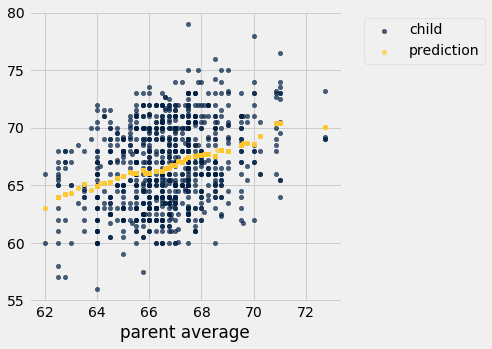

In [53]:
height_pred.select('child', 'parent average', 'prediction').scatter('parent average')